In [1]:
train_data='/kaggle/input/fruit-and-vegetable-image-recognition/train'
test_data='/kaggle/input/fruit-and-vegetable-image-recognition/test'
val_data='/kaggle/input/fruit-and-vegetable-image-recognition/validation'

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [4]:
batch_size = 32
image_size = 256

train_data_cnn = tf.keras.preprocessing.image_dataset_from_directory(train_data,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

val_data_cnn = tf.keras.preprocessing.image_dataset_from_directory(val_data,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [5]:
train_data_ann = keras.utils.image_dataset_from_directory(
    directory = train_data,
    
    
    batch_size=32,
    image_size=(28,28)
)
test_data_ann = keras.utils.image_dataset_from_directory(
    directory = test_data,
    
    
    batch_size=32,
    image_size=(28,28)
)
val_data_ann = keras.utils.image_dataset_from_directory(
    directory = val_data,
    
    
    batch_size=32,
    image_size=(28,28)
)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [6]:
classes = train_data_ann.class_names
print((classes))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [7]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [31]:
train_ann = train_data_ann.map(format)
test_ann = test_data_ann.map(format)
train_cnn = train_data_cnn.map(format)
val_data_cnn = val_data_cnn.map(format)


In [9]:
X_train=[]
y_train=[]
for format_image_batch, format_label_batch in train_cnn:
    for j in format_image_batch:
        X_train.append(j)
    for j in format_label_batch:
        y_train.append(j)

In [10]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [11]:
X_train_ann=[]
y_train_ann=[]
for format_image_batch, format_label_batch in train_ann:
    for j in format_image_batch:
        X_train_ann.append(j)
    for j in format_label_batch:
        y_train_ann.append(j)

In [12]:
X_test_ann=[]
y_test_ann=[]
for format_image_batch, format_label_batch in test_ann:
    for j in format_image_batch:
        X_test_ann.append(j)
    for j in format_label_batch:
        y_test_ann.append(j)

In [13]:
X_train_ann=np.array(X_train_ann)
X_test_ann=np.array(X_test_ann)
y_train_ann=np.array(y_train_ann)
y_test_ann=np.array(y_test_ann)

In [14]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

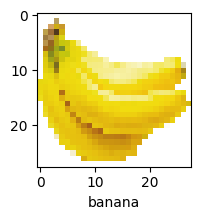

In [16]:
plot_sample(X_train_ann, y_train_ann, 1)

In [17]:
pip install scikit-image

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(36, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=ann.fit(X_train_ann, y_train_ann, epochs=100,validation_data=val_data_ann)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1728929990.104085     105 service.cc:145] XLA service 0x78073c006890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728929990.104147     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728929990.104153     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


65/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0443 - loss: 3.6340

I0000 00:00:1728929991.031147     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.0497 - loss: 3.6016 - val_accuracy: 0.0712 - val_loss: 279.4746
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1208 - loss: 3.2942 - val_accuracy: 0.0883 - val_loss: 315.4991
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1781 - loss: 3.0562 - val_accuracy: 0.2564 - val_loss: 187.2734
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2216 - loss: 2.8726 - val_accuracy: 0.2991 - val_loss: 180.7000
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2691 - loss: 2.7248 - val_accuracy: 0.3191 - val_loss: 223.7676
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2865 - loss: 2.5930 - val_accuracy: 0.2821 - val_loss: 237.4650
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3024 - loss: 2.5008 - val_accuracy: 0.4359 - val_loss: 158.3247
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3599 - loss: 2.4048 - val_accuracy: 

In [19]:
test_loss, test_acc = ann.evaluate(X_test_ann, y_test_ann, verbose=1) # verbose is a parameter of how detailed is the log in the console
print("************ Test accuracy : ", test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9575 - loss: 0.2013
************ Test accuracy :  0.9637883305549622


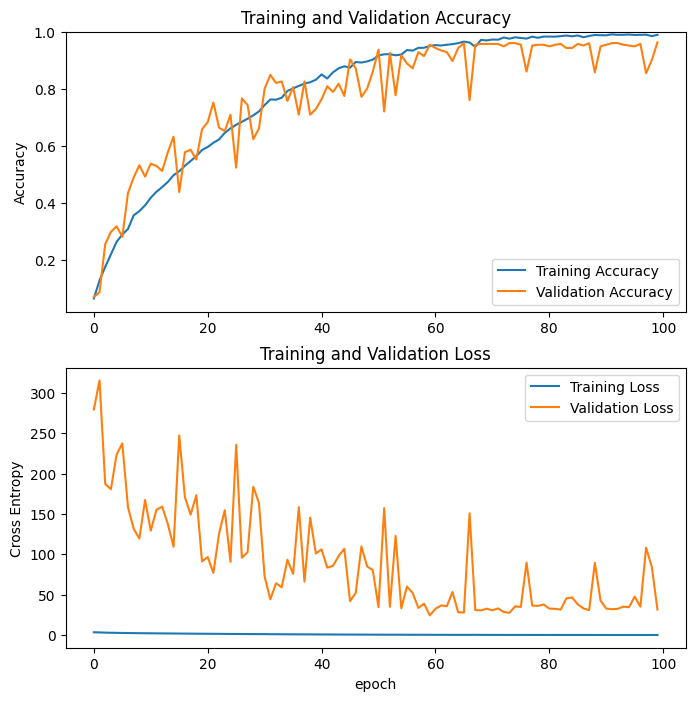

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((28, 28))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

a=np.array(img_tensor)

p=[]
p.append(img_tensor)
p=np.array(p)
y_pred = ann.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print(classes[y_classes[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
apple


## CNN

In [23]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn_history=cnn.fit(X_train, y_train, epochs=20,validation_data=val_data_cnn)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9895 - loss: 0.0245 - val_accuracy: 0.9573 - val_loss: 0.3384
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9895 - loss: 0.0209 - val_accuracy: 0.9573 - val_loss: 0.3341
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9914 - loss: 0.0149 - val_accuracy: 0.9601 - val_loss: 0.3248
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9929 - loss: 0.0153 - val_accuracy: 0.9544 - val_loss: 0.3364
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9922 - loss: 0.0143 - val_accuracy: 0.9630 - val_loss: 0.3183
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9937 - loss: 0.0139 - val_accuracy: 0.9573 - val_loss: 0.3362
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9880 - loss: 0.0170 - val_accuracy: 0.9544 - val_loss: 0.3464
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9942 - loss: 0.0102 - val_accuracy: 0.9630 -

# Data Augmentation

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
import tensorflow as tf

In [49]:
train_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(64, 64),
                                                                 batch_size=32)

Found 3115 files belonging to 36 classes.


In [50]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=True,
                                  rotation_range=40,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2
                                )
training_set = train_datagen.flow_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/train',
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='categorical')

Found 3115 images belonging to 36 classes.


In [51]:
val_datagen = ImageDataGenerator(rescale=1/255.)

validation_set = val_datagen.flow_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/validation',
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='categorical')

Found 351 images belonging to 36 classes.


In [52]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_set = test_datagen.flow_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/test',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 359 images belonging to 36 classes.


In [53]:
classes = train_data.class_names
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [54]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [55]:
model = Sequential()

model.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,activation='relu',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=36,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,028 (1.79 MB)

 Trainable params: 468,004 (1.79 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [56]:
r = model.fit(training_set,
              epochs=100,
              batch_size=32,
              validation_data=validation_set,
              )

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 853ms/step - accuracy: 0.0381 - loss: 4.1322 - val_accuracy: 0.0427 - val_loss: 3.5829
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 759ms/step - accuracy: 0.0958 - loss: 3.3793 - val_accuracy: 0.0256 - val_loss: 3.8651
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 782ms/step - accuracy: 0.1322 - loss: 3.0841 - val_accuracy: 0.0484 - val_loss: 4.0227
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 777ms/step - accuracy: 0.1886 - loss: 2.8312 - val_accuracy: 0.1852 - val_loss: 3.0131
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 799ms/step - accuracy: 0.2342 - loss: 2.6200 - val_accuracy: 0.1225 - val_loss: 2.9157
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 810ms/step - accuracy: 0.2449 - loss: 2.5511 - val_accuracy: 0.2336 - val_loss: 2.4825
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 799ms/step - accuracy: 0.2519 - loss: 2.4599 - val_accuracy: 0.2564 - val_loss: 3.1187
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 789ms/step - accuracy: 0.2771 - loss: 2.4036 - 

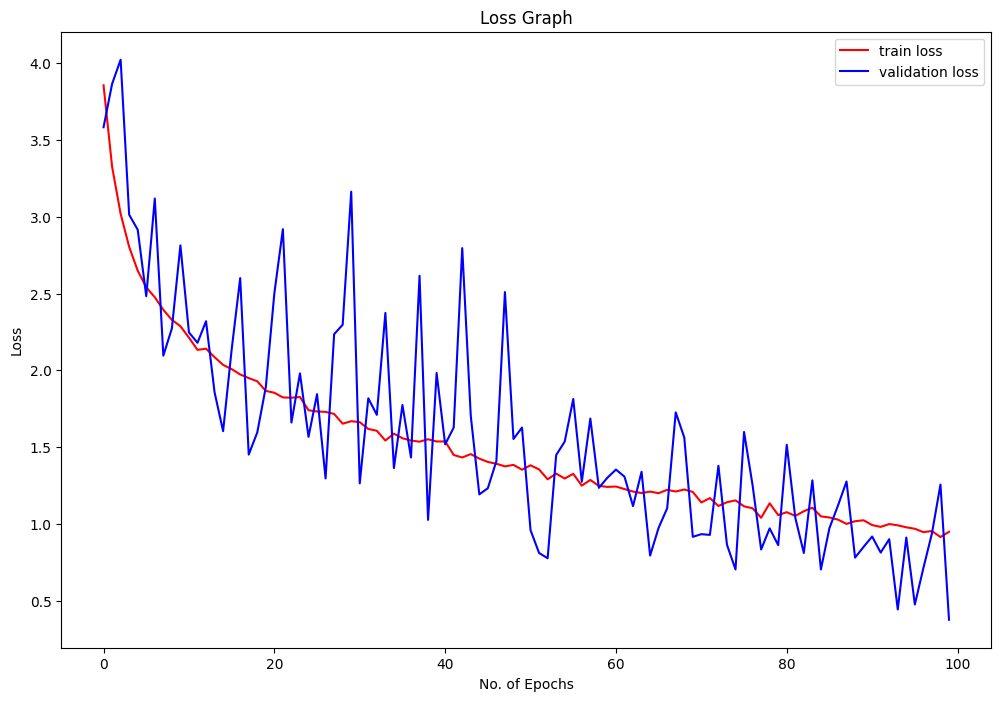

In [58]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

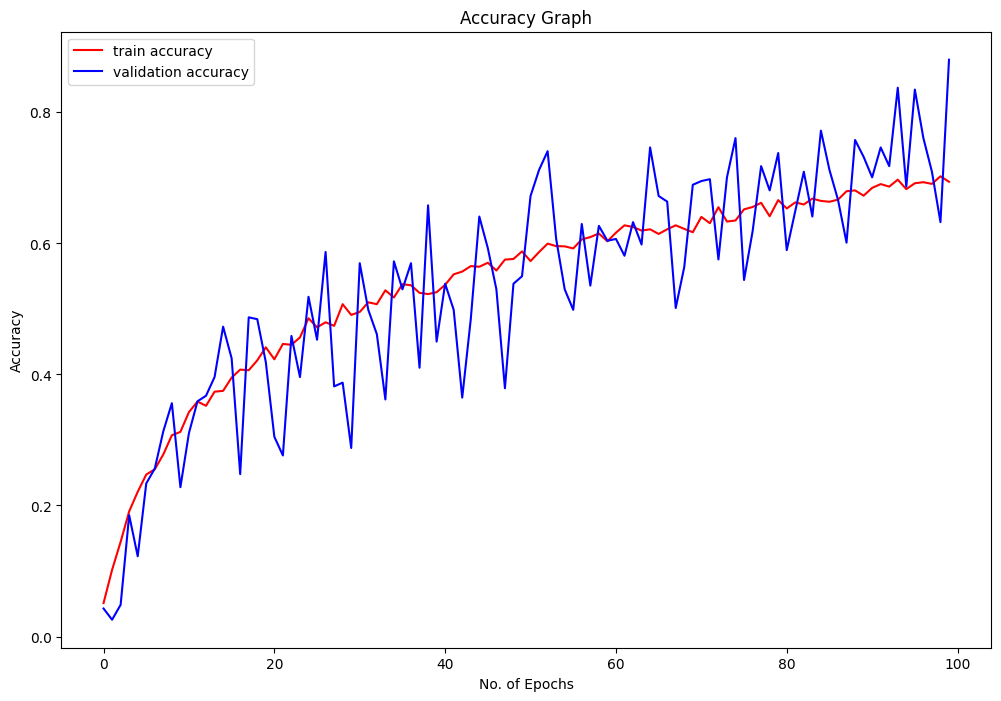

In [59]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [60]:
model.evaluate(test_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 952ms/step - accuracy: 0.9047 - loss: 0.3305


[0.37182167172431946, 0.8802228569984436]

In [61]:
import tensorflow as tf

In [62]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/home/bcca/Desktop/download.jpeg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((32, 32))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

# Print the shape of the tensor
print(img_tensor.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bcca/Desktop/download.jpeg'

In [ ]:
import numpy as np

In [ ]:
a=np.array(img_tensor)

p=[]
p.append(img_tensor)
p=np.array(p)

In [ ]:
y_pred = model.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print((classes[y_classes[0]]))